In [2]:
# http://pandas.pydata.org/pandas-docs/version/0.15.2/10min.html
import pandas as pd
import os
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
from sklearn.covariance import GraphLassoCV
from sklearn.metrics import mutual_info_score
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import matplotlib.patches as patches
import scipy.io

In [3]:
labels_Glasser = pd.read_csv("labels_Glasser.csv",header=None)[0].tolist()
Nvars = len(labels_Glasser)

In [105]:
# [01] Pearson correlation:

# give a path to the folder with the resting state datasets on second level:
foldername = 'output_second_level/'
condition = 'restingstate_day1'  # restingstate_day1 / restingstate_day2 / WM / MOTOR
if condition == 'restingstate_day1':
    T = 2390
if condition == 'restingstate_day2':
    T = 2390
if condition == 'WM':    
    T = 800
if condition == 'MOTOR':
    T = 558

filename = foldername + 'pearsonr_all_' + condition + '.mat'
pearsonr_all = scipy.io.loadmat(filename)['pearsonr_all']

In [47]:
# perform the t-test on Pearson's r in order to get p-values for all the connections:
k = pearsonr_all.shape[0]
vec_zeros = np.zeros((k,1))
group_p_pearsonr = np.zeros((Nvars,Nvars))

for ind1 in range(Nvars):
    for ind2 in range(Nvars):
        vec_results = pearsonr_all[:,ind1,ind2]
        (t,prob) = stats.ttest_ind(vec_results, vec_zeros)
        group_p_pearsonr[ind1,ind2] = prob

mean_pearsonr = np.mean(pearsonr_all,axis=0)

In [48]:
# perform Benjamini-Hochberg FWE correction for multiple testing with statsmodels.sandbox.stats.multicomp package:
from statsmodels.compat.python import range
from statsmodels.compat.collections import OrderedDict
import statsmodels.sandbox.stats.multicomp
import distutils.util

# make a vector from all p-values:
pvals = group_p_pearsonr.ravel() 
Ntests = len(pvals)

# apply Benjamini-Hochberg at the chosen level of significance:
alpha = 0.05 
(bool_significant) = statsmodels.sandbox.stats.multicomp.multipletests(pvals, alpha=alpha, method='hs', is_sorted=False, returnsorted=False)[0]

bool_significant01 = np.zeros((pvals.shape))
for ind in range(Ntests):
    bool_significant01[ind] = int(bool(bool_significant[ind]))
    
bool_significant01 = np.reshape(bool_significant01, (Nvars,Nvars))
nonsignificant_x = np.where(bool_significant01 == 0)[0]
nonsignificant_y = np.where(bool_significant01 == 0)[1]

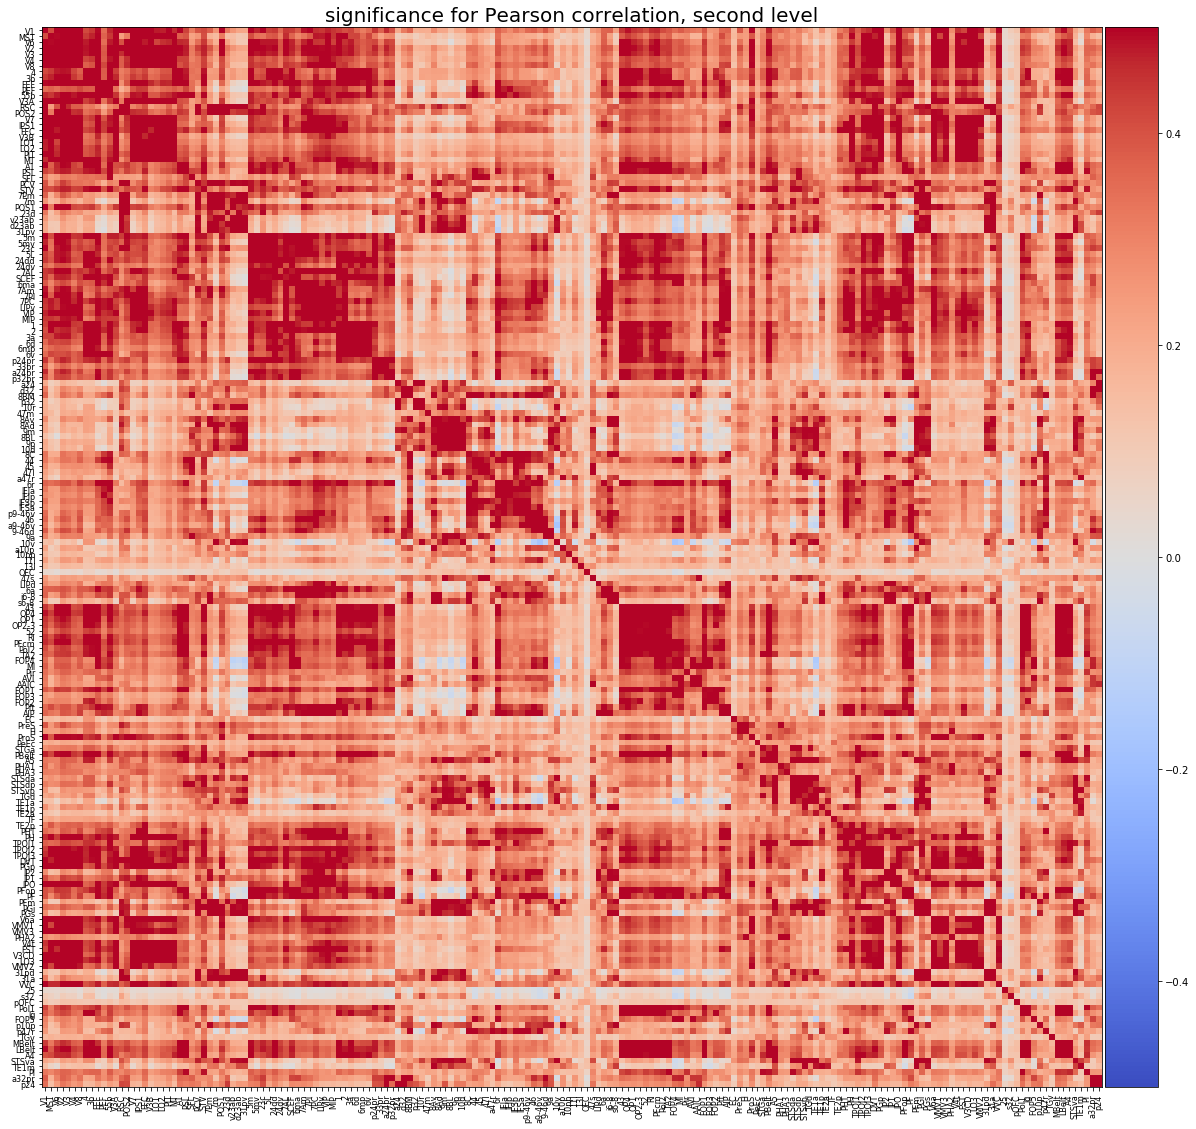

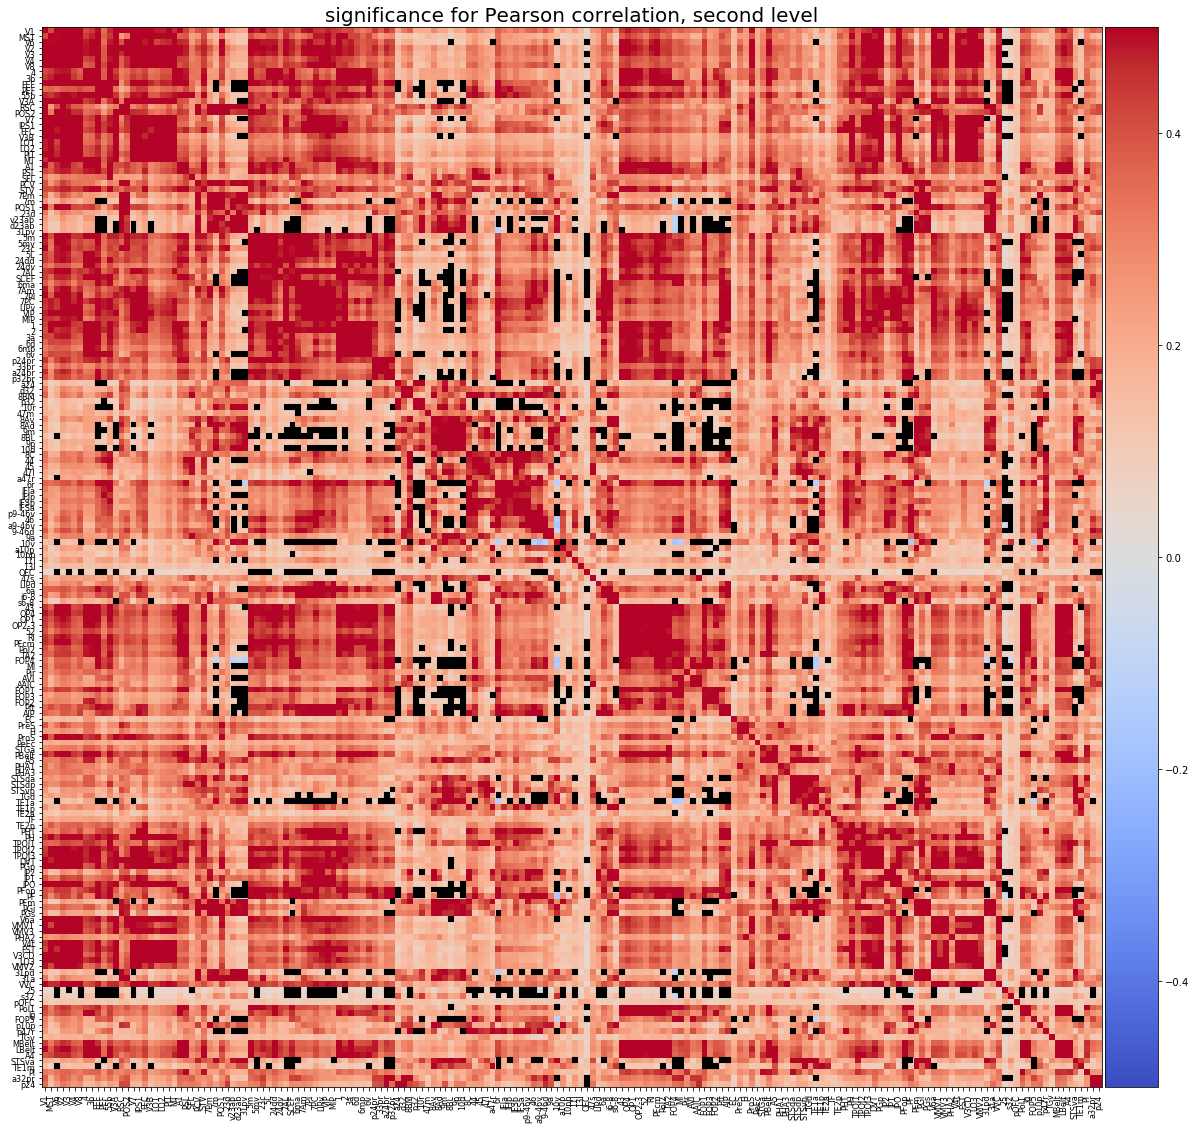

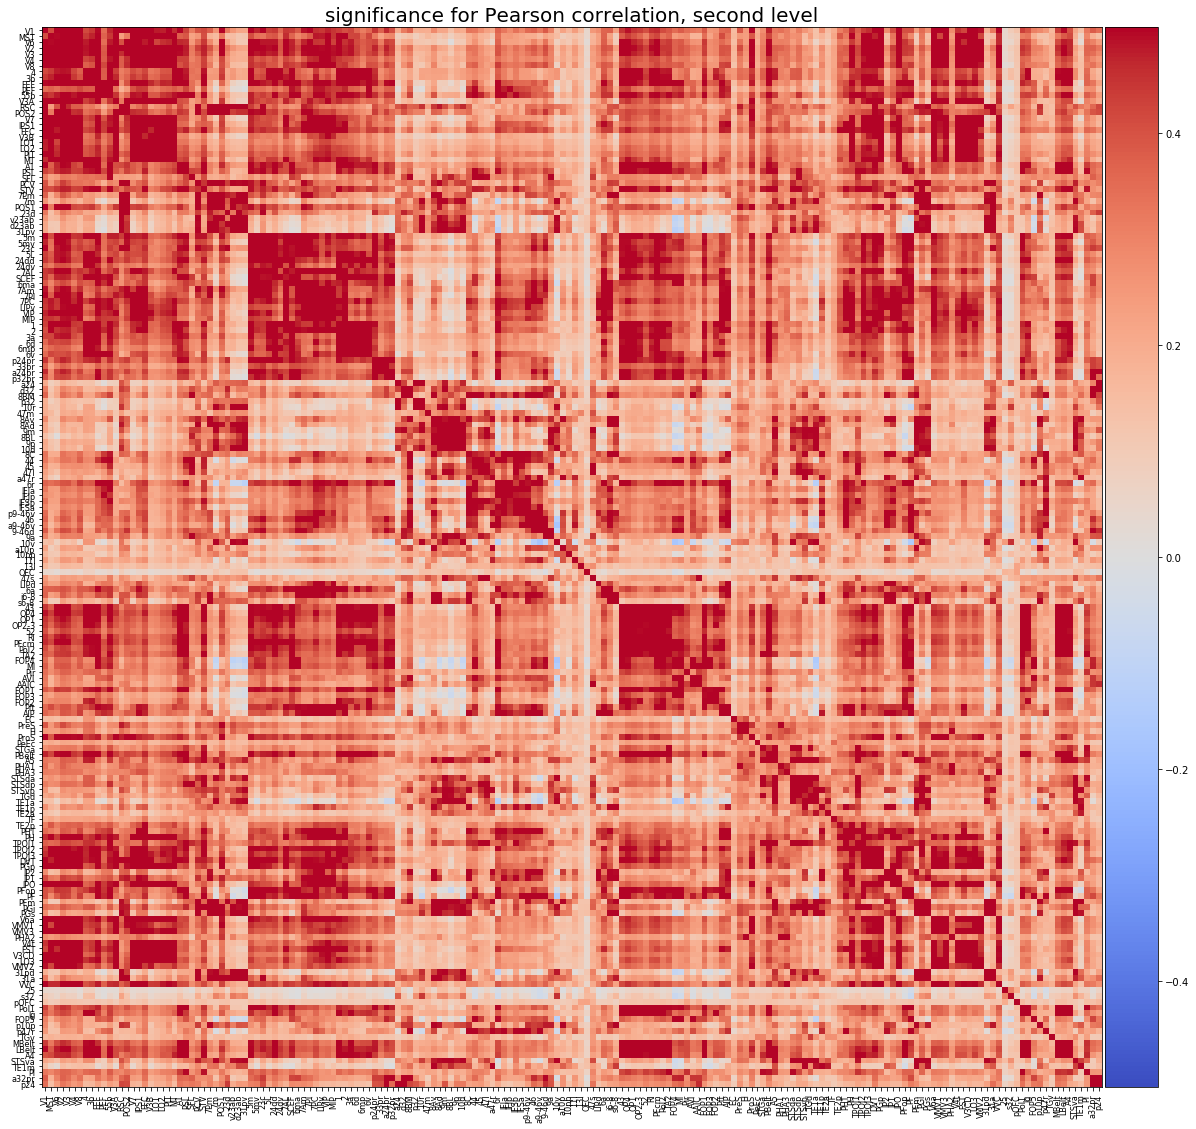

In [50]:
# plot the results, choosing only correlations which pass the Benjamini-Hochberg correction:
f = plt.figure(figsize=(20,20))
ax = plt.gca()
im = plt.imshow(mean_pearsonr, clim=[-0.5,0.5], cmap='coolwarm')
plt.xticks(np.arange(len(labels_Glasser)), labels_Glasser, rotation='vertical', fontsize=8)
plt.yticks(np.arange(len(labels_Glasser)), labels_Glasser, fontsize=8)
plt.title('significance for Pearson correlation, second level', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# exclude non-significant results:
for ind in range(len(nonsignificant_x)):
    # Create a Rectangle patch to cover each nonsignifcant result:
    rect = patches.Rectangle((nonsignificant_x[ind]-0.5,nonsignificant_y[ind]-0.5),1,1,linewidth=0.1,edgecolor='k',facecolor='k')
    ax.add_patch(rect)
plt.show()

# show the same without correction:
f = plt.figure(figsize=(20,20))
ax = plt.gca()
im = plt.imshow(mean_pearsonr, clim=[-0.5,0.5], cmap='coolwarm')
plt.xticks(np.arange(len(labels_Glasser)), labels_Glasser, rotation='vertical', fontsize=8)
plt.yticks(np.arange(len(labels_Glasser)), labels_Glasser, fontsize=8)
plt.title('significance for Pearson correlation, second level', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

In [42]:
# [02] partial correlation:

# give a path to the folder with the resting state datasets on second level:
foldername = 'output_second_level/'
condition = 'restingstate_day1'  # restingstate_day1 / restingstate_day2 / WM / MOTOR

filename = foldername + 'partial_correlation_all_' + condition + '.mat'
partial_correlation_all = scipy.io.loadmat(filename)['partial_correlation_all']

In [43]:
# perform the t-test on partial correlation in order to get p-values for all the connections:
k = partial_correlation_all.shape[0]
vec_zeros = np.zeros((k,1))
group_p_partial_correlation = np.zeros((Nvars,Nvars))

for ind1 in range(Nvars):
    for ind2 in range(Nvars):
        vec_results = partial_correlation_all[:,ind1,ind2]
        (t,prob) = stats.ttest_ind(vec_results, vec_zeros)
        group_p_partial_correlation[ind1,ind2] = prob

mean_partial_correlation = np.mean(partial_correlation_all,axis=0)

In [44]:
# perform Benjamini-Hochberg FWE correction for multiple testing with statsmodels.sandbox.stats.multicomp package:
from statsmodels.compat.python import range
from statsmodels.compat.collections import OrderedDict
import statsmodels.sandbox.stats.multicomp
import distutils.util

# make a vector from all p-values:
pvals = group_p_partial_correlation.ravel() 
Ntests = len(pvals)
# apply Benjamini-Hochberg:
alpha=0.05
(bool_significant) = statsmodels.sandbox.stats.multicomp.multipletests(pvals, alpha=alpha, method='hs', is_sorted=False, returnsorted=False)[0]

bool_significant01 = np.zeros((pvals.shape))
for ind in range(Ntests):
    bool_significant01[ind] = int(bool(bool_significant[ind]))
    
bool_significant01 = np.reshape(bool_significant01, (Nvars,Nvars))
nonsignificant_x = np.where(bool_significant01 == 0)[0]
nonsignificant_y = np.where(bool_significant01 == 0)[1]

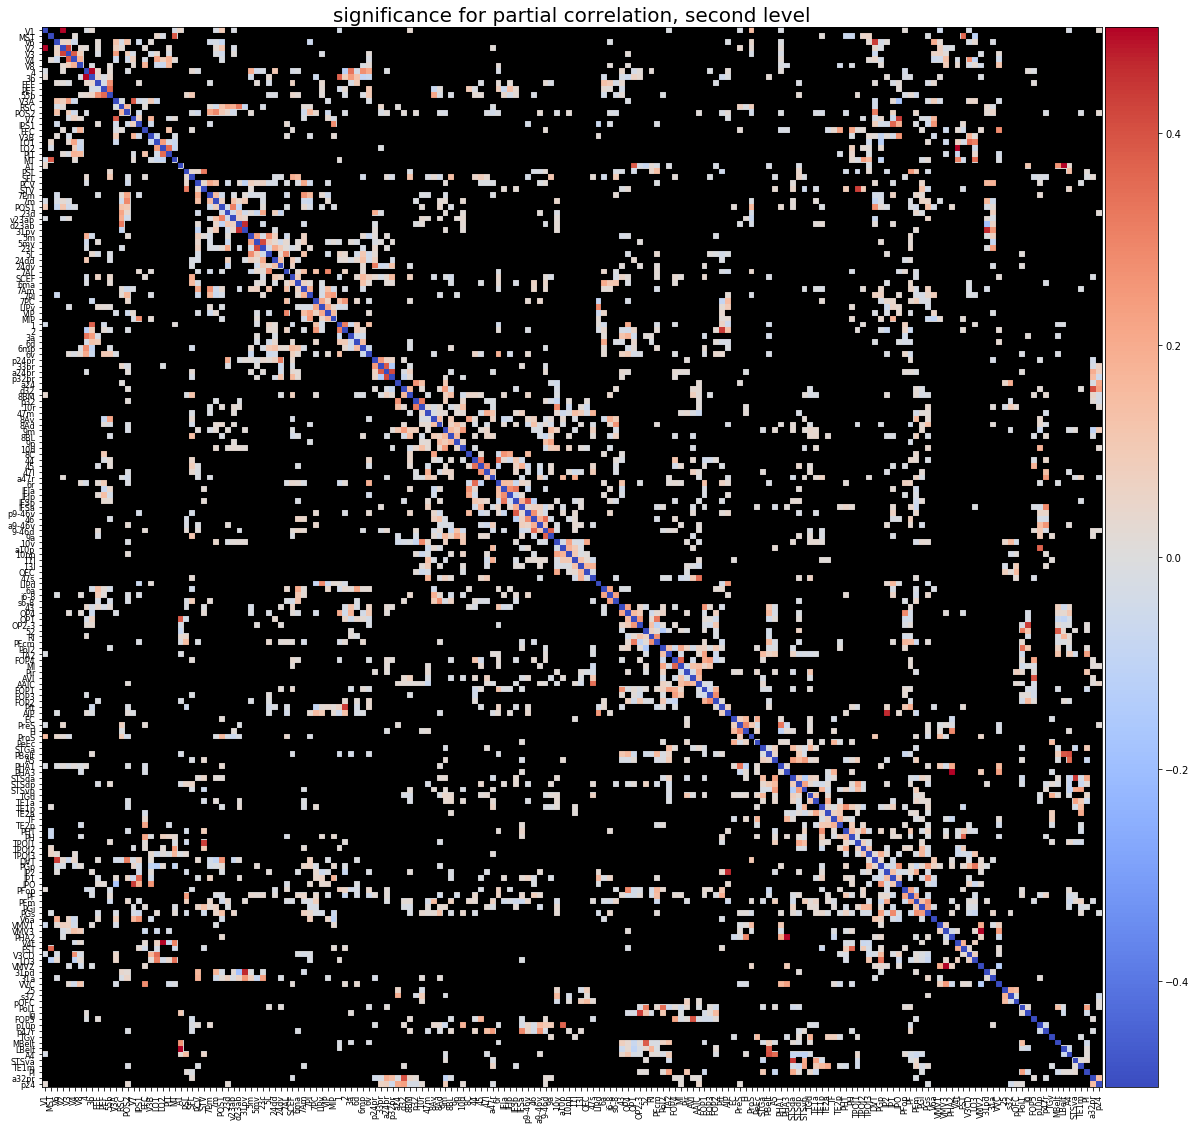

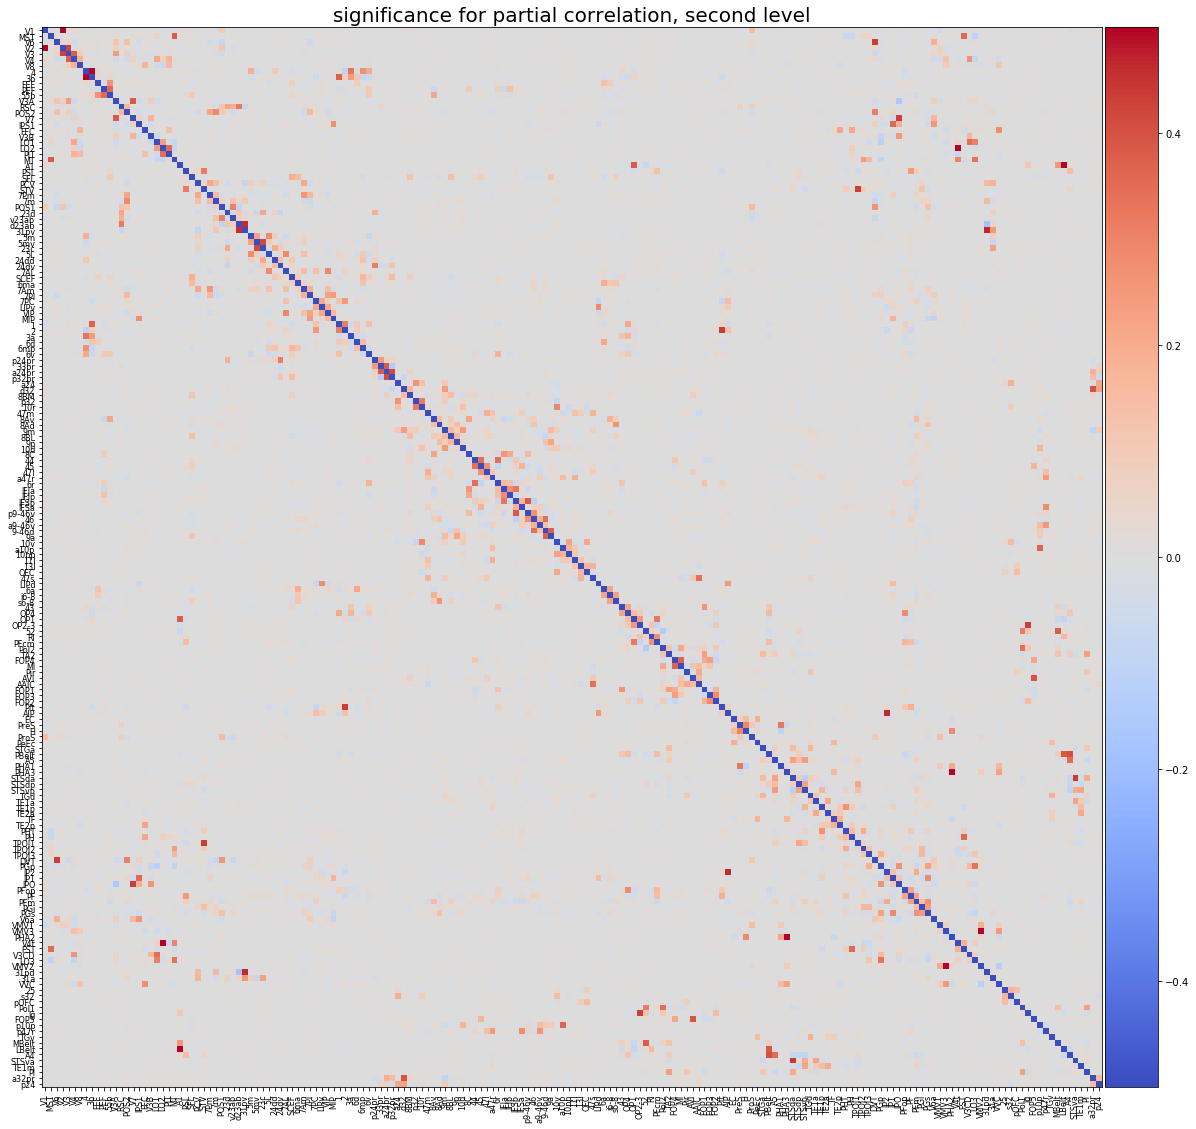

In [45]:
# plot the results, choosing only correlations which pass the Benjamini-Hochberg correction:
f = plt.figure(figsize=(20,20))
ax = plt.gca()
im = plt.imshow(mean_partial_correlation, clim=[-0.5,0.5], cmap='coolwarm')
plt.xticks(np.arange(len(labels_Glasser)), labels_Glasser, rotation='vertical', fontsize=8)
plt.yticks(np.arange(len(labels_Glasser)), labels_Glasser, fontsize=8)
plt.title('significance for partial correlation, second level', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# exclude non-significant results:
for ind in range(len(nonsignificant_x)):
    # print str(nonsignificant_x[ind]) + ' ' + str(nonsignificant_y[ind])
    # Create a Rectangle patch
    rect = patches.Rectangle((nonsignificant_x[ind]-0.5,nonsignificant_y[ind]-0.5),1,1,linewidth=0.1,edgecolor='k',facecolor='k')
    ax.add_patch(rect)
plt.show()

# ---------------
# show the same without correction for multiple comparisons:
f = plt.figure(figsize=(20,20))
ax = plt.gca()
im = plt.imshow(mean_partial_correlation, clim=[-0.5,0.5], cmap='coolwarm')
plt.xticks(np.arange(len(labels_Glasser)), labels_Glasser, rotation='vertical', fontsize=8)
plt.yticks(np.arange(len(labels_Glasser)), labels_Glasser, fontsize=8)
plt.title('significance for partial correlation, second level', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

In [112]:
# [04] mutual information:

# give a path to the folder with the resting state datasets on second level:
foldername = 'output_second_level/'
condition = 'restingstate_day1'  # restingstate_day1 / restingstate_day2 / WM / MOTOR

filename = foldername + 'mutual_information_all_' + condition + '.mat'
mutual_information_all = scipy.io.loadmat(filename)['mutual_information_all']
filename1 = foldername + 'mutual_information_all_surrogate_' + condition + '.mat'
mutual_information_all_surrogate = scipy.io.loadmat(filename1)['mutual_information_all_surrogate']

In [113]:
# perform the t-test on mutual information in order to get p-values for all the connections:
k = mutual_information_all.shape[0]


bins = 10

for ind1 in range(Nvars):
    for ind2 in range(Nvars):
        vec_results           = mutual_information_all[:,ind1,ind2]
        vec_results_surrogate = mutual_information_all_surrogate[:,ind1,ind2]

        (t,prob) = scipy.stats.f_oneway(vec_results, vec_results_surrogate)
        group_p_mutual_information[ind1,ind2] = prob

mean_mutual_information = np.mean(mutual_information_all,axis=0)
print group_p_mutual_information
print mutual_information_all[:,1,2]
print mutual_information_all_surrogate[:,1,2]

[[             nan   3.51443008e-21   1.37733521e-62 ...,   2.81699429e-23
    3.25275946e-30   1.23615079e-21]
 [  3.51443008e-21              nan   1.51704165e-31 ...,   3.37153990e-22
    5.17283698e-13   4.40214075e-11]
 [  1.37733521e-62   1.51704165e-31              nan ...,   1.28078743e-23
    5.30219232e-21   4.29312777e-15]
 ..., 
 [  2.81699429e-23   3.37153990e-22   1.28078743e-23 ...,              nan
    4.62227198e-15   4.63616144e-16]
 [  3.25275946e-30   5.17283698e-13   5.30219232e-21 ...,   4.62227198e-15
               nan   7.10076984e-64]
 [  1.23615079e-21   4.40214075e-11   4.29312777e-15 ...,   4.63616144e-16
    7.10076984e-64              nan]]
[ 0.11802105  0.56960582  0.15271861  0.42660706  0.43502377  0.08541427
  0.40487135  0.49753022  0.70708921  0.3243327   0.21641531  0.07446455
  0.12930225  0.40798416  0.12649523  0.16618763  0.03881109  0.13489369
  0.41824418  0.59687982  0.18327892  0.25029417  0.53613389  0.0864091
  0.30923772  0.17111334  0.4

In [114]:
# perform Benjamini-Hochberg FWE correction for multiple testing with statsmodels.sandbox.stats.multicomp package:
from statsmodels.compat.python import range
from statsmodels.compat.collections import OrderedDict
import statsmodels.sandbox.stats.multicomp
import distutils.util

# make a vector from all p-values:
pvals = group_p_mutual_information.ravel() 
Ntests = len(pvals)
# apply Benjamini-Hochberg:
alpha = 0.05
(bool_significant) = statsmodels.sandbox.stats.multicomp.multipletests(pvals, alpha=alpha, method='hs', is_sorted=False, returnsorted=False)[0]

bool_significant01 = np.zeros((pvals.shape))
for ind in range(Ntests):
    bool_significant01[ind] = int(bool(bool_significant[ind]))
    
bool_significant01 = np.reshape(bool_significant01, (Nvars,Nvars))
nonsignificant_x = np.where(bool_significant01 == 0)[0]
nonsignificant_y = np.where(bool_significant01 == 0)[1]
print len(nonsignificant_x)

190


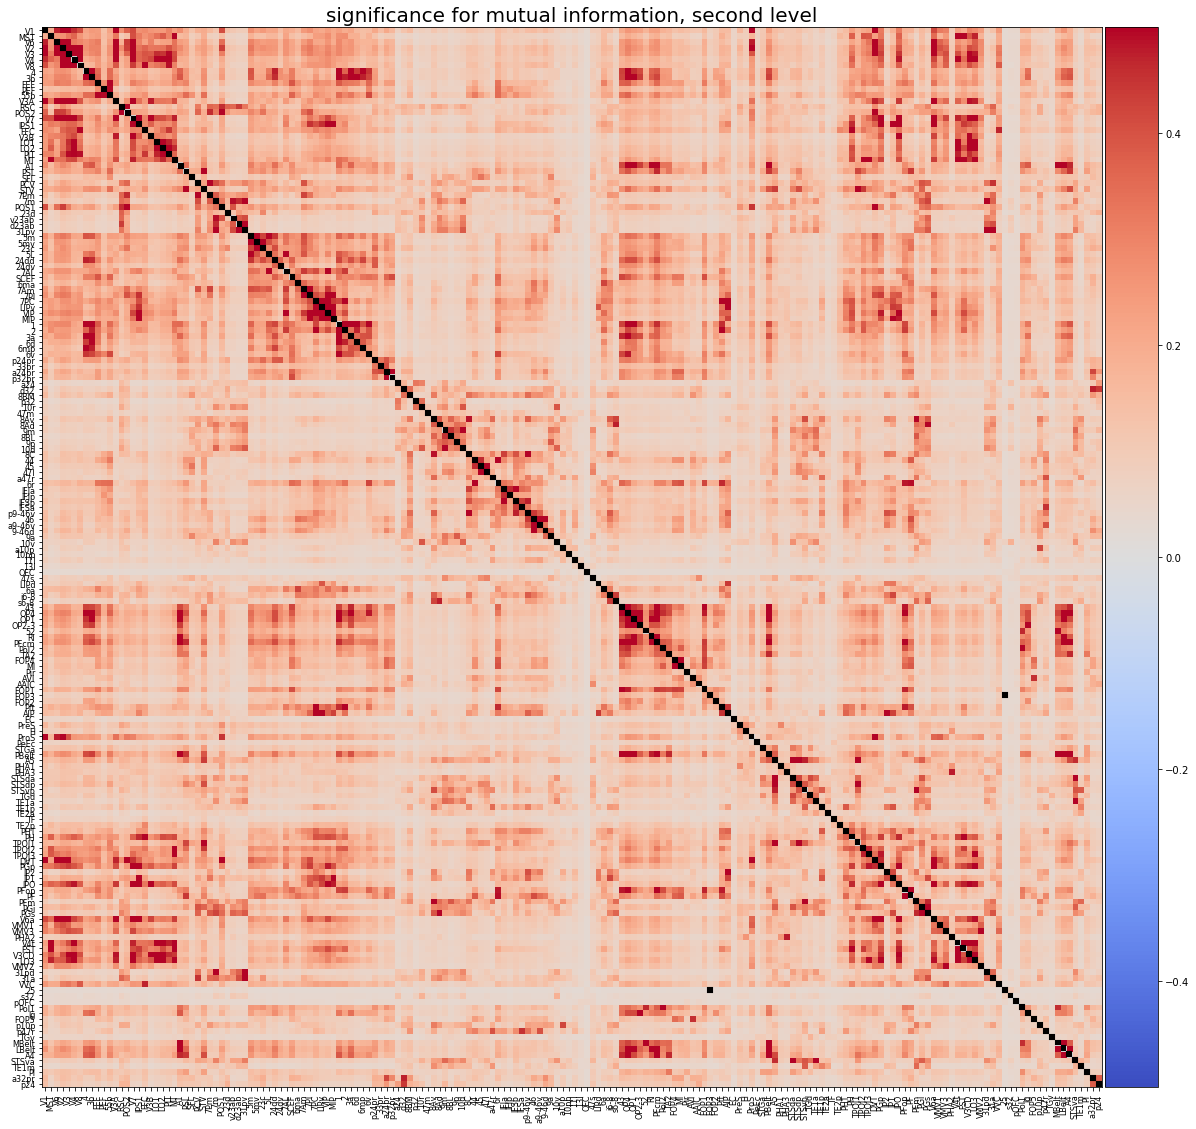

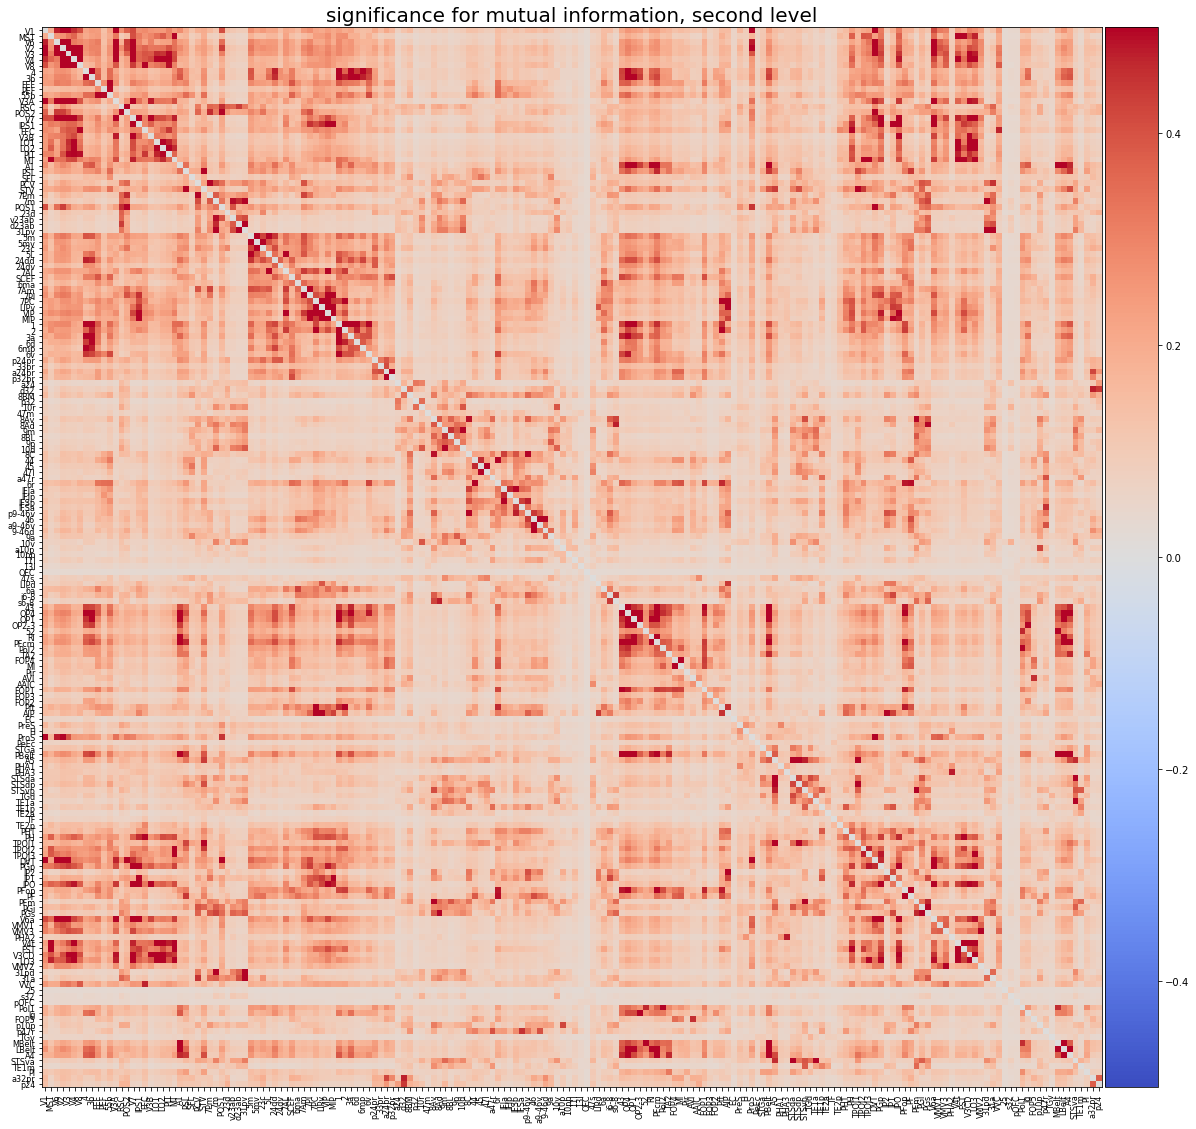

In [110]:
# plot the results, choosing only mutual information values which pass the Benjamini-Hochberg correction:
f = plt.figure(figsize=(20,20))
ax = plt.gca()
im = plt.imshow(mean_mutual_information, clim=[-0.5,0.5], cmap='coolwarm')
plt.xticks(np.arange(len(labels_Glasser)), labels_Glasser, rotation='vertical', fontsize=8)
plt.yticks(np.arange(len(labels_Glasser)), labels_Glasser, fontsize=8)
plt.title('significance for mutual information, second level', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# exclude non-significant results:
for ind in range(len(nonsignificant_x)):
    # print str(nonsignificant_x[ind]) + ' ' + str(nonsignificant_y[ind])
    # Create a Rectangle patch
    rect = patches.Rectangle((nonsignificant_x[ind]-0.5,nonsignificant_y[ind]-0.5),1,1,linewidth=0.1,edgecolor='k',facecolor='k')
    ax.add_patch(rect)
plt.show()

# ---------------
# show the same without correction for multiple comparisons:
f = plt.figure(figsize=(20,20))
ax = plt.gca()
im = plt.imshow(mean_mutual_information, clim=[-0.5,0.5], cmap='coolwarm')
plt.xticks(np.arange(len(labels_Glasser)), labels_Glasser, rotation='vertical', fontsize=8)
plt.yticks(np.arange(len(labels_Glasser)), labels_Glasser, fontsize=8)
plt.title('significance for mutual information, second level', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()